In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from fastai.datasets import *
from fastai.vision import *
sns.set()

In [5]:
path = untar_data(URLs.MNIST)
data = ImageDataBunch.from_folder(path, train="training", valid="testing")

In [6]:
learner = cnn_learner(data, models.resnet18, metrics=[error_rate])

In [8]:
learner.fit(epochs=3, lr=1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.149112,0.082329,0.027300,03:07
1,0.126640,0.054277,0.017200,00:47
2,0.084791,0.046142,0.014500,00:48


In [9]:
learner.save("resnet18", return_path=True)

PosixPath('/home/jupyter/.fastai/data/mnist_png/models/resnet18.pth')

In [19]:
learner = learner.load("resnet18")

AttributeError: 'Learner' object has no attribute 'losses'

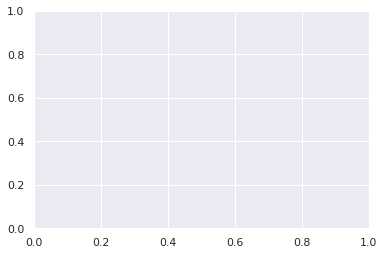

In [20]:
fig = learner.recorder.plot_losses(return_fig=True, skip_start=150)
fig.set_size_inches(12, 6)

In [21]:
# load handwritten samples
with open("handwritten.pkl", "rb") as f:
    X_hw, y_hw = pickle.load(f)

In [62]:
im_path = Path("./010_experimental-preprocessing/results")
fn_paths = im_path.glob("*/*.bmp")

val_data = ImageDataBunch.from_name_re(
    path=im_path,
    fnames=fn_paths,
    pat=r"/([0-9])\/[0-9]+.bmp$",
    valid_pct=0.5,
    bs=5,
)
learner.data = val_data

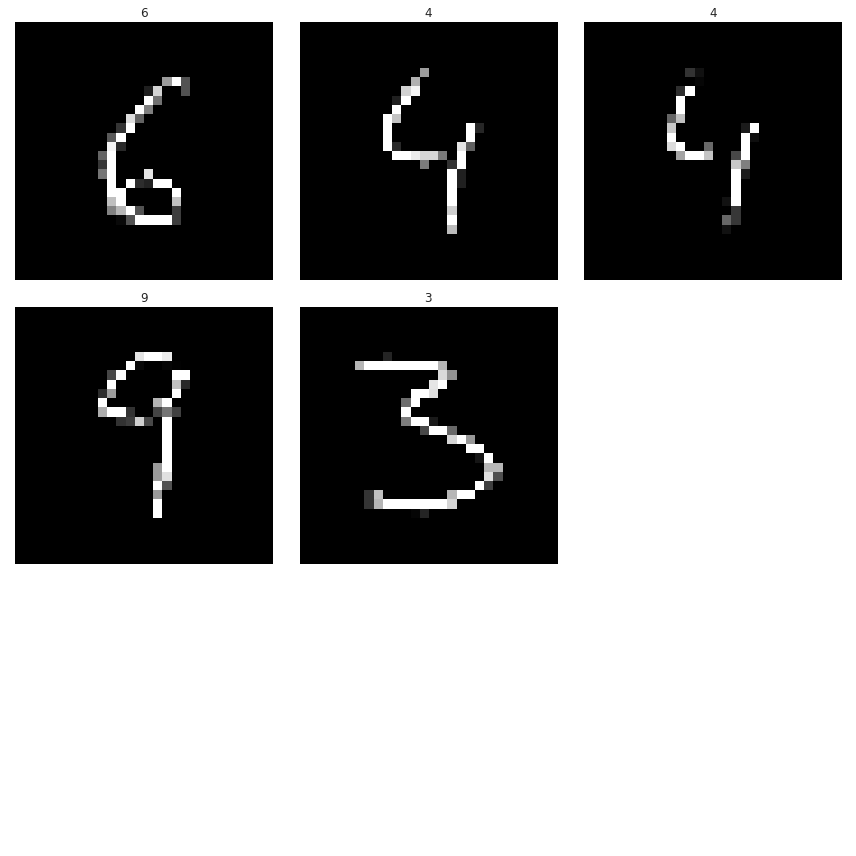

In [63]:
val_data.show_batch()

In [75]:
learner.unfreeze()
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


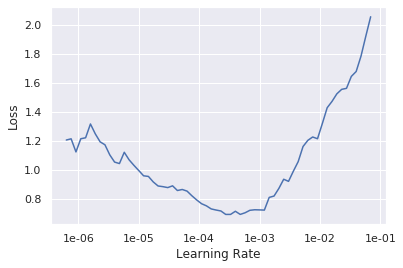

In [80]:
learner.recorder.plot()

In [81]:
learner.fit_one_cycle(10, slice(1e-5, 8e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.487277,0.086307,0.020000,00:00
1,0.572410,0.093735,0.020000,00:00
2,0.670579,0.084373,0.020000,00:00
3,0.682042,0.114612,0.020000,00:00
4,0.676052,0.132586,0.040000,00:00
5,0.680704,0.054461,0.020000,00:00
6,0.653992,0.085100,0.020000,00:00
7,0.851731,0.062923,0.020000,00:00
8,0.768040,0.067460,0.020000,00:00
9,0.708678,0.039963,0.000000,00:00


In [82]:
learner.validate(val_data.train_dl, metrics=[error_rate])

[0.013150415, tensor(0.)]

In [83]:
interpr = learner.interpret()

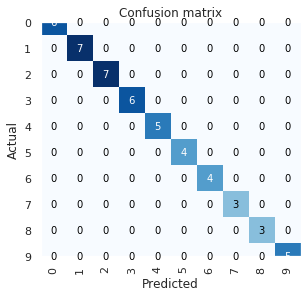

In [84]:
interpr.plot_confusion_matrix()

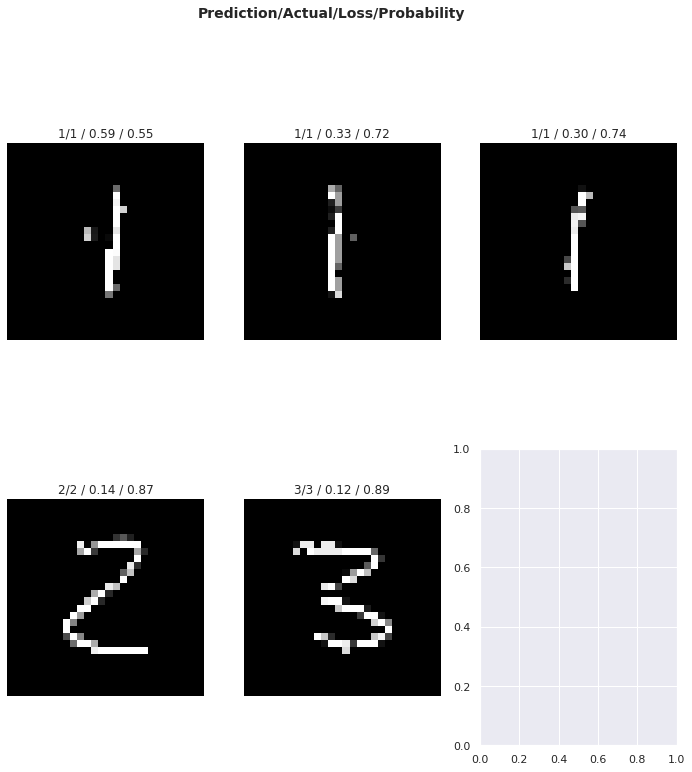

In [85]:
interpr.plot_top_losses(5)